# kmeans

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

from matplotlib import rc, font_manager
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib
matplotlib.rcParams["axes.unicode_minus"] = False
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans

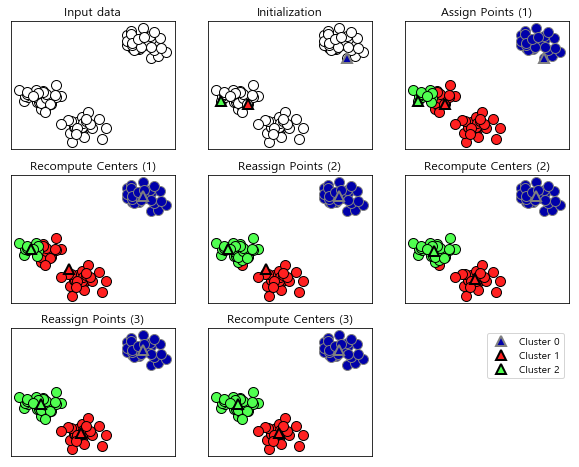

In [4]:
mglearn.plots.plot_kmeans_algorithm()

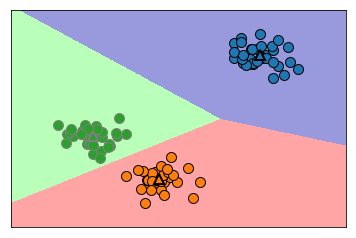

In [5]:
mglearn.plots.plot_kmeans_boundaries()

In [7]:
X, y = datasets.make_blobs(random_state=1)

In [9]:
km = KMeans(n_clusters=3).fit(X)

In [11]:
print(km.labels_)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [13]:
lbl = km.labels_

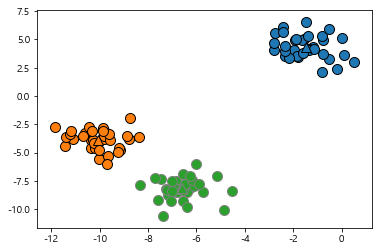

In [18]:
mglearn.discrete_scatter(X[:,0], X[:,1], lbl, markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], [0,1,2], markers="^")

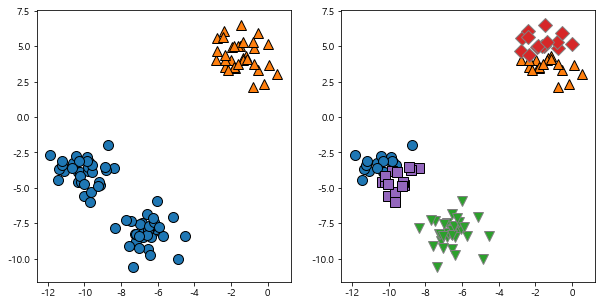

In [19]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
idx =0
for k in [2,5]:
    km = KMeans(n_clusters =k)
    km.fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:,0], X[:,1], lbl, ax=axes[idx])
    idx += 1

In [3]:
# iris 샘플을 이용한 예제
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['target']

Text(0.5, 1.0, '꽃잎')

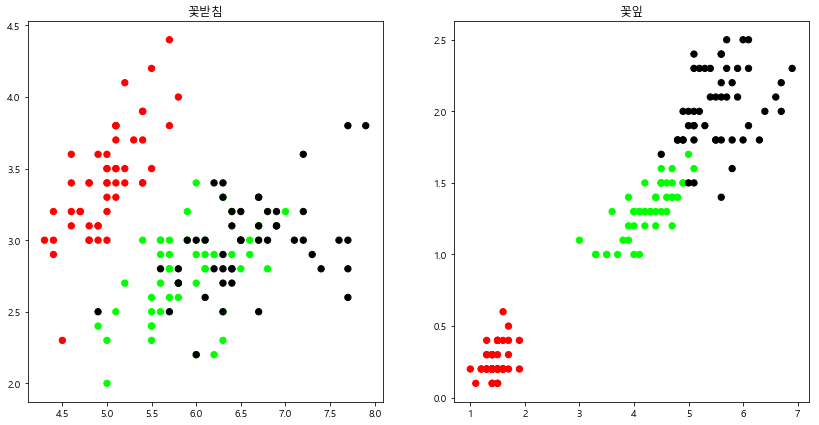

In [4]:
# 꽃잎(petal)과 꽃받침(sepal) 중 어떤 것이 더 분류하기 쉬운가?
plt.figure(figsize=(14, 7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1, 2, 1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title('꽃받침')

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title('꽃잎')

In [23]:
model = KMeans(n_clusters=3).fit(X)

Text(0.5, 1.0, '결과')

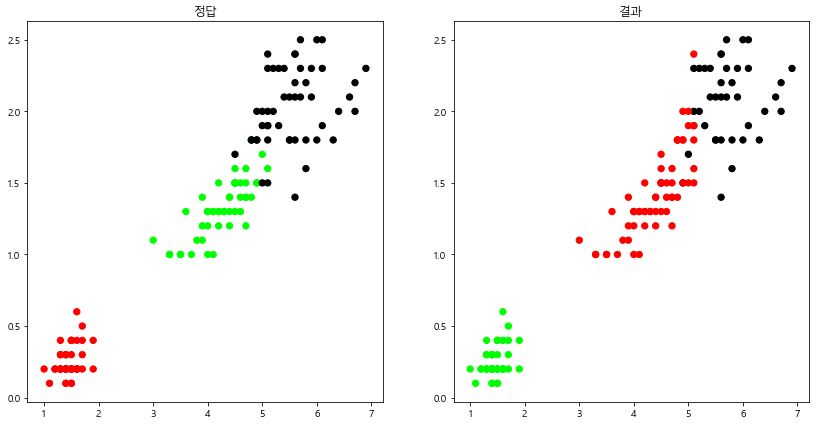

In [25]:
plt.figure(figsize=(14,7))
colormap = np.array(["red","lime","black"])

plt.subplot(1,2,1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("정답")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], s=40)
plt.title("결과")

In [26]:
accuracy_score(y, model.labels_)

0.24

In [27]:
# 오차표
metrics.confusion_matrix(y, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

In [29]:
# 사람들의 키와 몸무게를 이용한 k-means
df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]
df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


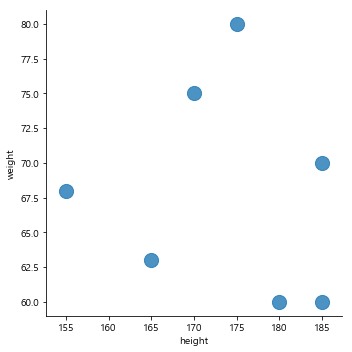

In [30]:
sns.lmplot('height','weight',data=df, fit_reg=False, scatter_kws={"s":200})

In [31]:
model = KMeans(n_clusters=3).fit(df.values)

In [33]:
model.labels_

array([0, 0, 0, 1, 1, 2, 2])

In [34]:
df["cluster_id"] = model.labels_
df

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,1
4,155,68,1
5,170,75,2
6,175,80,2


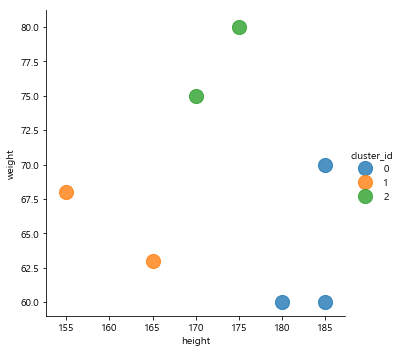

In [35]:
sns.lmplot('height','weight',data=df, fit_reg=False, scatter_kws={"s":200}, hue="cluster_id")